In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ls

Project Notebook.ipynb  sample_submission.csv   train.csv
README.md               test.csv


In [282]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [136]:
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [137]:
# Getting features, and numeric versus categorical features
feature_cols = train_df.columns[1:]
discrete_variables  = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin']
numeric_variables = ["RoomService", "Spa", "FoodCourt", "ShoppingMall", "VRDeck"]

In [138]:
# Quick view of Transported by each variable
train_df.groupby('Transported').count()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
Transported,,,,,,,,,,,,,
False,4315,4217,4204,4216,4225,4226,4216,4217,4231,4221,4223,4225,4216
True,4378,4275,4272,4278,4286,4288,4274,4295,4279,4264,4287,4280,4277


In [139]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [140]:
# Checking Null Values
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [141]:
# I can't just drop the nulls broadly, because they are widespread and we lose a lot of records
train_df.count(), train_df.dropna().count()

(PassengerId     8693
 HomePlanet      8492
 CryoSleep       8476
 Cabin           8494
 Destination     8511
 Age             8514
 VIP             8490
 RoomService     8512
 FoodCourt       8510
 ShoppingMall    8485
 Spa             8510
 VRDeck          8505
 Name            8493
 Transported     8693
 dtype: int64,
 PassengerId     6606
 HomePlanet      6606
 CryoSleep       6606
 Cabin           6606
 Destination     6606
 Age             6606
 VIP             6606
 RoomService     6606
 FoodCourt       6606
 ShoppingMall    6606
 Spa             6606
 VRDeck          6606
 Name            6606
 Transported     6606
 dtype: int64)

In [142]:
# Filling categorical Nulls for now, so that I can do some data viz
train_df[discrete_variables] = train_df[discrete_variables].fillna('MISSING')

In [143]:
train_df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', 'MISSING'], dtype=object)

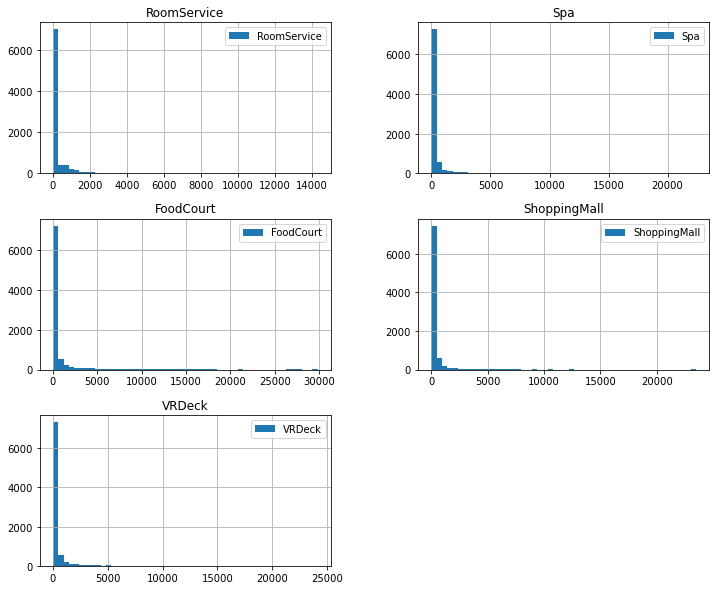

In [144]:
# Histograms for numeric variables - not normal
train_df[numeric_variables].hist(bins=50, figsize=(12, 10), legend=True)

plt.show()

In [145]:
# Checking unique values for discrete variables - Cabin is too unique
train_df[discrete_variables].nunique()

HomePlanet        4
CryoSleep         3
Destination       4
VIP               3
Cabin          6561
dtype: int64

Text(0.5, 0, 'Age (years)')

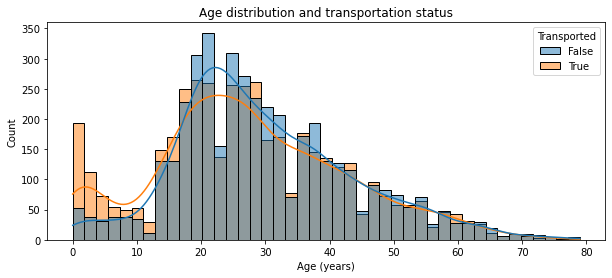

In [146]:
# Pretty similar distribution of transported versus not
plt.figure(figsize=(10,4))

sns.histplot(train_df, x=train_df["Age"], hue="Transported", kde=True)

# Aesthetics
plt.title("Age distribution and transportation status")
plt.xlabel("Age (years)")

<AxesSubplot:>

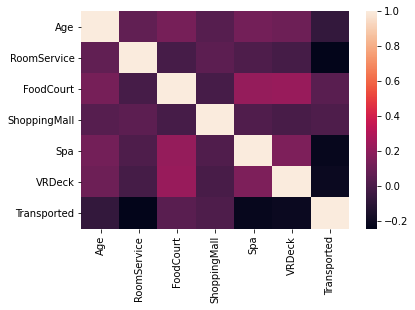

In [147]:
# Looking at data across all dimensions
corr = train_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Text(0.5, 0, 'Count of Passengers')

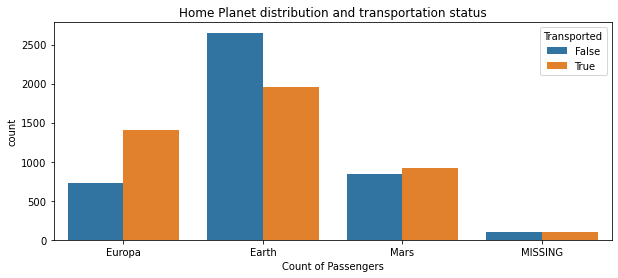

In [148]:
# Not a terrible signal...
plt.figure(figsize=(10,4))

sns.countplot(data=train_df, x="HomePlanet", hue="Transported")

# Aesthetics
plt.title("Home Planet distribution and transportation status")
plt.xlabel("Count of Passengers")

Text(0.5, 0, 'Count of Passengers')

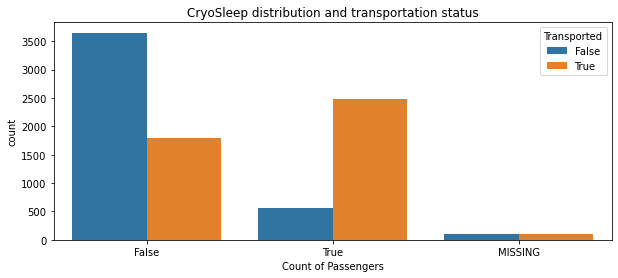

In [149]:
# Not a terrible signal...
plt.figure(figsize=(10,4))

sns.countplot(data=train_df, x="CryoSleep", hue="Transported")

# Aesthetics
plt.title("CryoSleep distribution and transportation status")
plt.xlabel("Count of Passengers")

Text(0.5, 0, 'Count of Passengers')

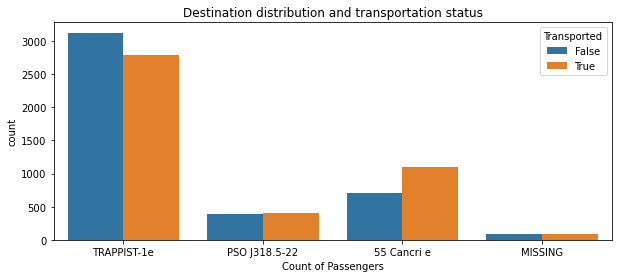

In [150]:
# Indifferent
plt.figure(figsize=(10,4))

sns.countplot(data=train_df, x="Destination", hue="Transported")

# Aesthetics
plt.title("Destination distribution and transportation status")
plt.xlabel("Count of Passengers")

Text(0.5, 0, 'Count of Passengers')

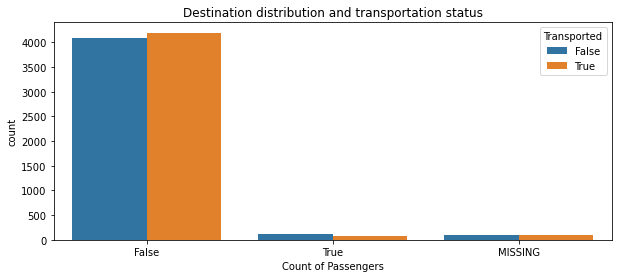

In [151]:
# Not enough people with VIP to matter
plt.figure(figsize=(10,4))

sns.countplot(data=train_df, x="VIP", hue="Transported")

# Aesthetics
plt.title("Destination distribution and transportation status")
plt.xlabel("Count of Passengers")

Text(0.5, 0, 'Count of Passengers')

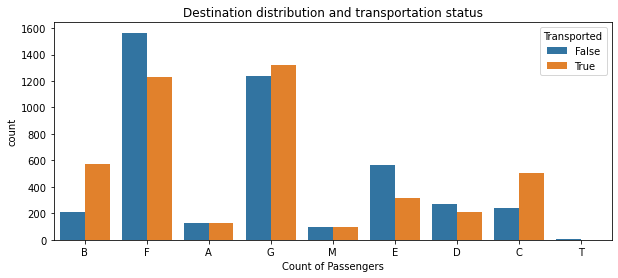

In [230]:
# Inspecting Cabin Feature Engineering....deck and cabin_type (made up names) could be good variables
plt.figure(figsize=(10,4))

train_df_cab = train_df.copy(deep=True)

train_df_cab['deck'] = train_df.Cabin.str[:1]
train_df_cab['cabin_type'] = train_df.Cabin.str[-1:]

sns.countplot(data=train_df_cab, x="deck", hue="Transported")

# Aesthetics
plt.title("Destination distribution and transportation status")
plt.xlabel("Count of Passengers")

In [232]:
# Adding new cabin fields to train_df
train_df['deck'] = train_df.Cabin.str[:1]
train_df['cabin_type'] = train_df.Cabin.str[-1:]

discrete_variables.extend(['deck','cabin_type'])
discrete_variables

['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Cabin',
 'deck',
 'cabin_type']

In [233]:
# Updating missing categorical variables....given the balance in missing and relatively low counts,
# I am going to fill based on mix of other values

imputed_df = train_df.copy(deep=True)

for variable in discrete_variables:
    # Getting MISSING indexes to fill with new values
    missing_indexes = train_df[train_df[variable]=='MISSING'].index
    
    # Creating new array with counts for each non-missing value
    non_missing_values = train_df[train_df[variable]!='MISSING'].groupby(by=variable).count()['PassengerId']
    
    # Setting options to fill missing values with
    value_options = list(non_missing_values.index)
    
    # Setting probabilities for random function to assign values
    value_mix = [x/sum(non_missing_values.values) for x in non_missing_values.values]
    
    # Creating array of values to populate
    missing_values = np.random.choice(value_options,len(missing_indexes), p=value_mix)
    
    # Assign values based on index of missing values and new values array
    imputed_df.loc[missing_indexes,variable] = missing_values


In [234]:
imputed_df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
deck              0
cabin_type        0
dtype: int64

In [235]:
# Reviewing values to ensure loop worked
imputed_df.groupby(by='HomePlanet').count()

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,cabin_type
HomePlanet,,,,,,,,,,,,,,,
Earth,4700,4700,4700,4700,4611,4700,4594,4603,4585,4600,4589,4590,4700,4700,4700
Europa,2186,2186,2186,2186,2140,2186,2148,2138,2132,2139,2149,2138,2186,2186,2186
Mars,1807,1807,1807,1807,1763,1807,1770,1769,1768,1771,1767,1765,1807,1807,1807


In [236]:
train_df.groupby(by='HomePlanet').count()

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,cabin_type
HomePlanet,,,,,,,,,,,,,,,
Earth,4602,4602,4602,4602,4514,4602,4499,4505,4490,4503,4491,4496,4602,4602,4602
Europa,2131,2131,2131,2131,2085,2131,2095,2085,2078,2086,2094,2085,2131,2131,2131
MISSING,201,201,201,201,199,201,195,199,194,198,200,194,201,201,201
Mars,1759,1759,1759,1759,1716,1759,1723,1721,1723,1723,1720,1718,1759,1759,1759


In [255]:
numeric_variables

['RoomService', 'Spa', 'FoodCourt', 'ShoppingMall', 'VRDeck']

In [245]:
# Filling numeric variable nulls with zero, since distribution skews toward zero and median of all variables is 0
imputed_df = imputed_df.fillna(0)

In [249]:
imputed_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,cabin_type
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,S


In [250]:
discrete_variables

['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Cabin',
 'deck',
 'cabin_type']

In [259]:
# Feature encoding - Given the lack of signal for most, I am only going to use CryoSleep, HomePlanet, Destination
# Scaling numerical variables
from sklearn.preprocessing import MinMaxScaler

# imputed_df.drop(['Cabin'],inplace=True)

updated_discrete_variable = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'deck', 'cabin_type']

cat_df = pd.get_dummies(imputed_df[updated_discrete_variable], drop_first=False)

In [260]:
# Scaling numerical features
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()
# transform data
num_df = pd.DataFrame(scaler.fit_transform(imputed_df[numeric_variables]),columns=numeric_variables)

In [266]:
train_df.Transported

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [265]:
final_feature_df.columns

Index(['CryoSleep', 'VIP', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'deck_A',
       'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_M',
       'deck_T', 'cabin_type_G', 'cabin_type_P', 'cabin_type_S', 'RoomService',
       'Spa', 'FoodCourt', 'ShoppingMall', 'VRDeck'],
      dtype='object')

In [268]:
final_feature_df = pd.merge(cat_df,num_df,left_index=True,right_index=True)
                            
final_feature_df.head()

,CryoSleep,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,deck_A,deck_B,...,deck_M,deck_T,cabin_type_G,cabin_type_P,cabin_type_S,RoomService,Spa,FoodCourt,ShoppingMall,VRDeck
0,False,False,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000
1,False,False,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0.007608,0.024500,0.000302,0.001064,0.001823
2,False,True,0,1,0,0,0,1,1,0,...,0,0,0,0,1,0.003001,0.299670,0.119948,0.000000,0.002030
3,False,False,0,1,0,0,0,1,1,0,...,0,0,0,0,1,0.000000,0.148563,0.043035,0.015793,0.007997
4,False,False,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0.021149,0.025214,0.002348,0.006428,0.000083


In [279]:
# Training the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Create a Random forest Classifier
clf = RandomForestClassifier(n_estimators = 150)

X_train, X_test, y_train, y_test = train_test_split(final_feature_df, train_df.Transported, test_size=0.2)

clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [280]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.8171362852213916


In [286]:
# Setting up test_df for submission

# Adding new cabin fields to test_df
test_df['deck'] = test_df.Cabin.str[:1]
test_df['cabin_type'] = test_df.Cabin.str[-1:]

# Filling categorical Nulls for now, so that I can do some data viz
test_df[discrete_variables] = test_df[discrete_variables].fillna('MISSING')

# Updating missing categorical variables....given the balance in missing and relatively low counts,
# I am going to fill based on mix of other values

imputed_test_df = test_df.copy(deep=True)

for variable in discrete_variables:
    # Getting MISSING indexes to fill with new values
    missing_indexes = test_df[test_df[variable]=='MISSING'].index
    
    # Creating new array with counts for each non-missing value
    non_missing_values = test_df[test_df[variable]!='MISSING'].groupby(by=variable).count()['PassengerId']
    
    # Setting options to fill missing values with
    value_options = list(non_missing_values.index)
    
    # Setting probabilities for random function to assign values
    value_mix = [x/sum(non_missing_values.values) for x in non_missing_values.values]
    
    # Creating array of values to populate
    missing_values = np.random.choice(value_options,len(missing_indexes), p=value_mix)
    
    # Assign values based on index of missing values and new values array
    imputed_test_df.loc[missing_indexes,variable] = missing_values

imputed_test_df = imputed_test_df.fillna(0)

# Feature encoding - Given the lack of signal for most, I am only going to use CryoSleep, HomePlanet, Destination
# Scaling numerical variables
from sklearn.preprocessing import MinMaxScaler

# imputed_df.drop(['Cabin'],inplace=True)

updated_discrete_variable = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'deck', 'cabin_type']

cat_test_df = pd.get_dummies(imputed_test_df[updated_discrete_variable], drop_first=False)

# Scaling numerical features
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()
# transform data
num_test_df = pd.DataFrame(scaler.fit_transform(imputed_df[numeric_variables]),columns=numeric_variables)

final_test_feature_df = pd.merge(cat_test_df,num_test_df,left_index=True,right_index=True)
                            
final_test_feature_df.head()


,CryoSleep,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,deck_A,deck_B,...,deck_M,deck_T,cabin_type_G,cabin_type_P,cabin_type_S,RoomService,Spa,FoodCourt,ShoppingMall,VRDeck
0,True,False,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,False,False,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0.007608,0.024500,0.000302,0.001064,0.001823
2,True,False,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0.003001,0.299670,0.119948,0.000000,0.002030
3,False,False,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0.000000,0.148563,0.043035,0.015793,0.007997
4,False,False,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0.021149,0.025214,0.002348,0.006428,0.000083


In [287]:
final_test_feature_df.columns

Index(['CryoSleep', 'VIP', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'deck_A',
       'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_M',
       'deck_T', 'cabin_type_G', 'cabin_type_P', 'cabin_type_S', 'RoomService',
       'Spa', 'FoodCourt', 'ShoppingMall', 'VRDeck'],
      dtype='object')

In [300]:
test_df['PassengerId']

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [301]:
y_sub = clf.predict(final_test_feature_df)

,0
0,True
1,True
2,False
3,False
4,True
...,...
4272,False
4273,True
4274,True
4275,False


In [308]:
pd.merge(test_df['PassengerId'],pd.DataFrame(y_sub,columns=['Transported']),left_index=True,right_index=True)\
            .to_csv('first_submission.csv',index=False)

### To Do
3. Remove un-important features
4. Gridsearch/optimization
5. Make a pipeline?
6. Compute missing values using a machine learning method
7. Try different model types

In [52]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [70]:
discrete_variables[:-2]

['HomePlanet', 'CryoSleep', 'Destination']

In [57]:
# Scaling numerical variables
from sklearn.preprocessing import MinMaxScaler

pd.get_dummies(train_df[discrete_variables[:-1]], drop_first=False)


,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0,1,0,1,0,0,0,1,1,0
1,1,0,0,1,0,0,0,1,1,0
2,0,1,0,1,0,0,0,1,0,1
3,0,1,0,1,0,0,0,1,1,0
4,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
8688,0,1,0,1,0,1,0,0,0,1
8689,1,0,0,0,1,0,1,0,1,0
8690,1,0,0,1,0,0,0,1,1,0
8691,0,1,0,1,0,1,0,0,1,0


In [ ]:
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)